In [7]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 610.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.0 MB 3.8 MB/s eta 0:01:41
   ---------------------------------------- 0.2/385.0 MB 2.5 MB/s eta 0:02:35
   ---------------------------------------- 0.4/385.0 MB 2.5 MB/s eta 0:02:36
   ---------------------------------------- 0.4/385.0 MB 2.8 MB/s eta 0:02:20
   ---------------------------------------- 0.5/385.0 MB 2.5 MB/s eta 0:02:33
   ---------------------------------------- 1.0/385.0 MB 3.6 MB/s eta 0:01:47
   ---------------------------------------- 1.2/385.0 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 1.2/385.0 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 1.6/385.0 MB 4.0 MB/s eta 0:0

In [8]:
!pip install numpy pandas matplotlib scikit-learn


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam


In [17]:
df = pd.read_csv('C:\\Users\srira\OneDrive\Desktop\AAPL.csv')

print("First 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   Unnamed: 0 symbol                       date    close     high     low  \
0           0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260  130.05   
1           1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950  131.10   
2           2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450  129.90   
3           3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390  130.05   
4           4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655  129.32   

     open    volume    adjClose     adjHigh      adjLow     adjOpen  \
0  130.34  45833246  121.682558  121.880685  119.844118  120.111360   
1  131.86  30733309  121.438354  121.595013  120.811718  121.512076   
2  131.23  50884452  120.056069  121.134251  119.705890  120.931516   
3  131.20  32112797  120.291057  121.078960  119.844118  120.903870   
4  129.86  33667627  119.761181  120.401640  119.171406  119.669029   

   adjVolume  divCash  splitFactor  
0   45833246      0.0          1.0  
1   307

In [19]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


In [20]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)


In [21]:
data = df[['close']].values


In [22]:
training_data_len = int(np.ceil(len(data) * 0.8))


In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [24]:
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)


In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


In [26]:
test_data = scaled_data[training_data_len - time_step:, :]
X_test, Y_test = create_dataset(test_data, time_step)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


C:\Users\srira\OneDrive\Documents\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [29]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=50, validation_data=(X_test, Y_test))


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0498 - val_loss: 0.0572
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0063 - val_loss: 0.0031
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0020 - val_loss: 0.0071
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.5765e-04 - val_loss: 0.0029
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 7.6207e-04 - val_loss: 0.0029
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.1820e-04 - val_loss: 0.0028
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.1488e-04 - val_loss: 0.0026
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 6.2140e-04 - val_loss: 0.0025
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 5.5082e-04 - val_loss: 0.0028
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 6.3283e-04 - val_loss: 0.0032
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.0881e-04 - val_loss: 0.0030
Epoch 12/50
15/15 ━━━━━━━━━━━━

In [30]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


In [31]:
actual_prices = data[training_data_len:, :]
valid = df[training_data_len:].reset_index(drop=True)
valid['Predictions'] = predictions


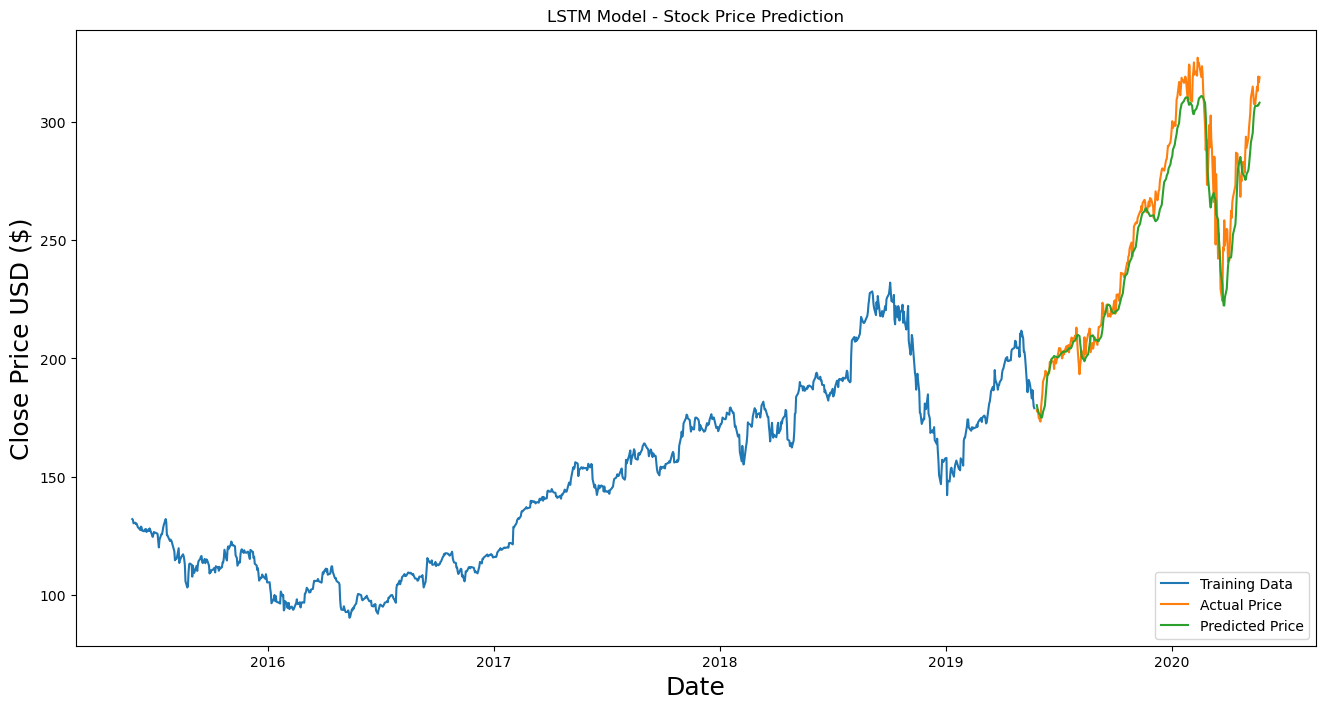

In [32]:
plt.figure(figsize=(16,8))
plt.title('LSTM Model - Stock Price Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['date'][:training_data_len], df['close'][:training_data_len], label='Training Data')
plt.plot(valid['date'], valid['close'], label='Actual Price')
plt.plot(valid['date'], valid['Predictions'], label='Predicted Price')
plt.legend(loc='lower right')
plt.show()


In [33]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(valid['close'], valid['Predictions']))
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 10.23434046221914
